Packages Required

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as mplt
from pylab import *

Inputs required for the function:

input_file = Input .csv file \\
col_anno = Column annotation file in .csv format \\
row_anno = Row annotation file in .csv format \\
col_celltype_name = The column name in the column annotation file which has the cell type information \\
row_celltype_name = The column name in the row annotation file which has the cell type information

In [2]:
def plot_heatmap(input_file, col_anno, row_anno, col_celltype_name, row_celltype_name):

  #Reading input file
  input_data = pd.read_csv(input_file, index_col= 0)
  
  #Reading row and column annotation file
  col_anno = pd.read_csv(col_anno, index_col= 0)
  row_anno = pd.read_csv(row_anno, index_col= 0)

  #Number of celltype defined
  uni_col = col_anno[col_celltype_name].unique()
  uni_row = row_anno[row_celltype_name].unique()

  #Giving Same name in row and column annotation cell types
  res = dict(zip(uni_col, uni_row))

  #Changing column annotation Cell type names
  col_anno[col_celltype_name] = col_anno[col_celltype_name].map(res)


  #Changing column names of input data with column annotaion
  input_data.columns = col_anno[col_celltype_name]

  # Extracting columns from row annotaion file having numerical values
  row_numeric_col = row_anno.select_dtypes(include= ['int16', 'int32', 'int64'])

  #Calculating number of cell type occuring
  cell_type = col_anno[col_celltype_name].value_counts().to_frame()
  cell_type = cell_type.reindex(index= uni_row)

  gene_sets = row_anno[row_celltype_name].value_counts().to_frame()
  gene_sets  = gene_sets.reindex(index= uni_row)

  #Calculating fraction of each cell type
  cell_type['percent'] = (cell_type[col_celltype_name] / 
                  cell_type[col_celltype_name].sum()) * 5

  gene_sets['percent'] = (gene_sets[row_celltype_name] / 
                  gene_sets[row_celltype_name].sum()) * 5

  

  #Defining widths and heights of subplots
  widths = [0.08]* len(row_numeric_col.columns)
  heights = gene_sets['percent'].to_list()

  total_widths = widths + cell_type['percent'].to_list()
  gs_kw = dict(width_ratios=total_widths, height_ratios=heights)

  #Defining colors for cmap
  cmap_list = ["Blues","Greens","Reds","Purples","Oranges","Greys","Vistia"]


  #Defining figure size and suplot dimensions
  fig, axn = mplt.subplots(len(heights), len(total_widths), sharex='col', sharey='row', gridspec_kw=gs_kw,figsize=(len(total_widths)*10, 
                                                                                                                 len(heights)*10))
  cbar_ax = fig.add_axes([.91, .3, .01, .4])

  for r, row in enumerate(axn):
    for c, ax in enumerate(row):
      if (c <= len(widths)-1): ## iterating till numeric columns in row annotation
        
        if (r == len(heights)-1): ##Turning of labels for 
          h = sns.heatmap(pd.DataFrame(row_anno.loc[row_anno[row_celltype_name] == uni_row[r], row_anno.columns[c]]),
                        xticklabels= False,yticklabels= False,cmap = cmap_list[c],
                        ax=ax, cbar= c+1, vmin=0, vmax=1,
                        cbar_kws={"orientation": "horizontal"})
          h.tick_params(right=False,left =False, labelright=False, labelleft=False)
          h.set_xlabel("")
          cbar = h.collections[0].colorbar
          cbar.set_label(row_anno.columns[c], rotation = 90, fontsize = 50)
                  
        else:
          h= sns.heatmap(pd.DataFrame(row_anno.loc[row_anno[row_celltype_name] == uni_row[r], row_anno.columns[c]]),
                        xticklabels=False, yticklabels= False,cmap = cmap_list[c],
                        ax=ax, cbar= None, vmin=0, vmax=1)
          h.tick_params(right=False,left =False, labelright=False, labelleft=False)
          h.set_xlabel("")
              
        if (c==0):
          ax.set_ylabel(uni_row[r], fontsize = 80)
        else:
          h.set_ylabel("")

      else:
        if (c-len(widths) < len(uni_col)-1):      
          
          h= sns.heatmap(input_data[uni_row[c-len(widths)]].loc[row_anno.index[row_anno[row_celltype_name] == uni_row[r]]],
                        xticklabels=False, yticklabels= False,cmap = 'flare',
                        ax=ax, cbar= r == 0, vmin=0, vmax=1,cbar_ax=None if r else cbar_ax)
          h.tick_params(right=False,left =False, labelright=False, labelleft=False)

                  
        else:
          h= sns.heatmap(input_data[uni_row[c-len(widths)]].loc[row_anno.index[row_anno[row_celltype_name] == uni_row[r]]], ax=ax,
                    xticklabels=False,cmap = 'flare', cbar= r == 0,vmin=0, vmax=1,cbar_ax=None if r else cbar_ax)
          h.tick_params(right=True,left =False, labelright=True, labelleft=False, rotation=0)

        if(r==0):
          ax.set_title(uni_col[c-len(widths)], fontsize =80)
        h.set_xlabel("")
        h.set_ylabel("")

        if(r == c- len(widths)):
          autoAxis = ax.axis()
          rec = Rectangle((autoAxis[0]+0.7,autoAxis[2]+0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=10)
          rec = ax.add_patch(rec)
          rec.set_clip_on(False)

  mplt.savefig("result.png", dpi =120)
  return h






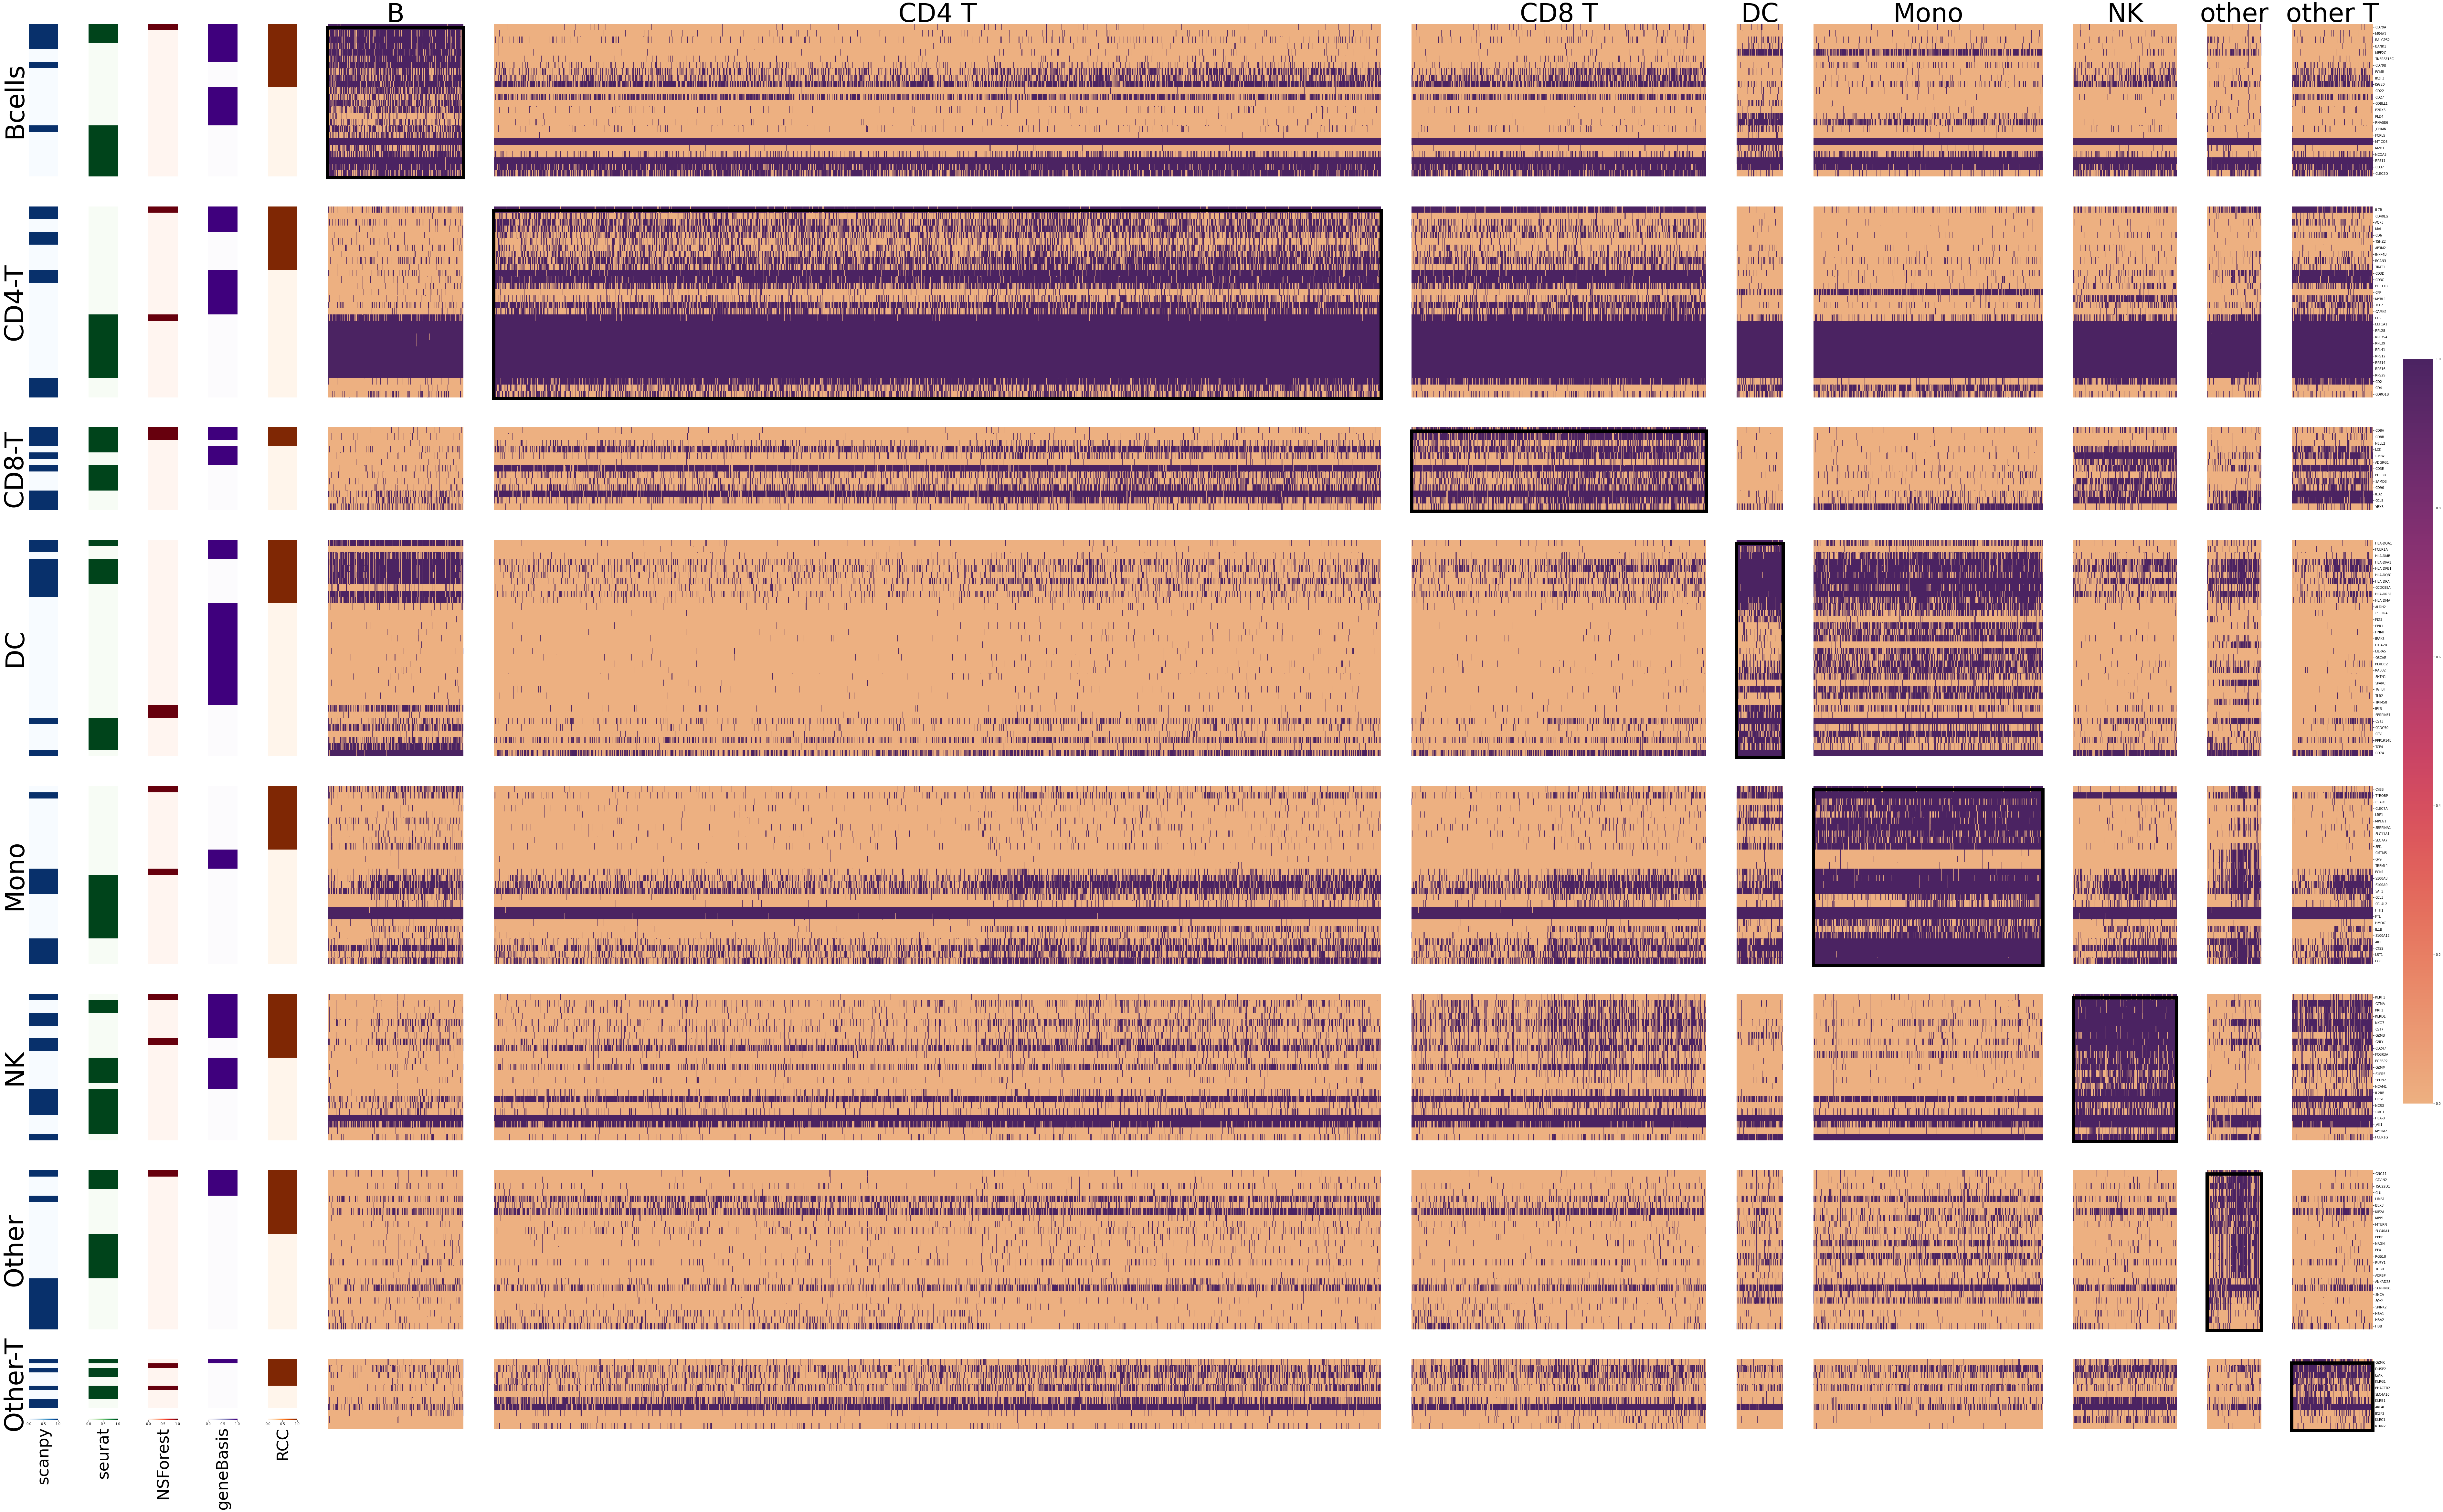

In [3]:
plot_heatmap(input_file= "input.csv", col_anno= "columnAnno.csv",
             row_anno= "rowAnno.csv", col_celltype_name = "cellType" , row_celltype_name = "cellType_1")